# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}units={units}&q={city}&appid={weather_api_key}"  

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
     
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tralee
Processing Record 2 of Set 1 | bamboo flat
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | nova vicosa
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | nova sintra
Processing Record 10 of Set 1 | ta`u
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | tchintabaraden
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | kamaishi
Processing Record 19 of Set 1 | kenai
Processing Record 20 of Set 1 | tabou
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0          tralee  52.2704   -9.7026     10.30        94          94   
1     bamboo flat  11.7000   92.7167     30.05        79          40   
2     olonkinbyen  70.9221   -8.7187      1.39        98         100   
3  puerto natales -51.7236  -72.4875      6.69        94         100   
4       carnarvon -24.8667  113.6333     23.48        35           0   

   Wind Speed Country        Date  
0        1.28      IE  1749263573  
1        0.51      IN  1749263575  
2        5.01      SJ  1749263127  
3        1.26      CL  1749263404  
4        7.00      AU  1749263578

In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                      
0                tralee  52.2704   -9.7026     10.30        94          94   
1           bamboo flat  11.7000   92.7167     30.05        79          40   
2           olonkinbyen  70.9221   -8.7187      1.39        98         100   
3        puerto natales -51.7236  -72.4875      6.69        94         100   
4             carnarvon -24.8667  113.6333     23.48        35           0   

         Wind Speed Country        Date  
City_ID                                  
0              1.28      IE  1749263573  
1              0.51      IN  1749263575  
2              5.01      SJ  1749263127  
3              1.26      CL  1749263404  
4              7.00      AU  1749263578

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

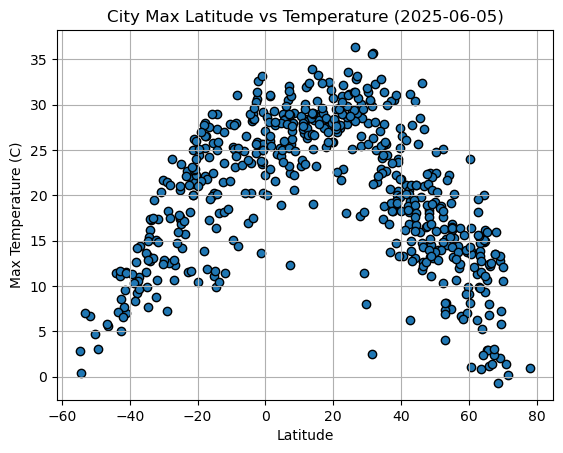

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black',  marker="o")

# Incorporate the other graph properties 
plt.title("City Max Latitude vs Temperature (2025-06-05)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

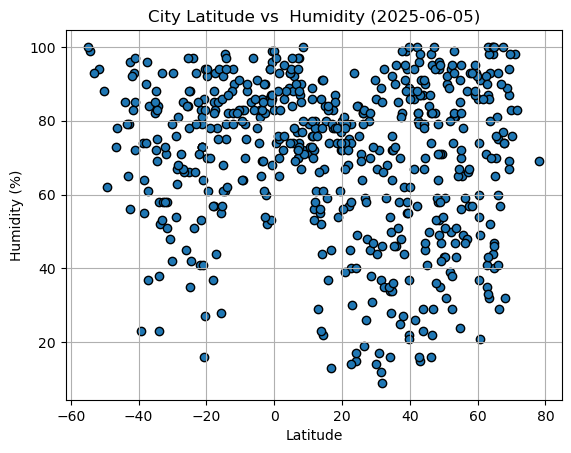

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black', marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs  Humidity (2025-06-05)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

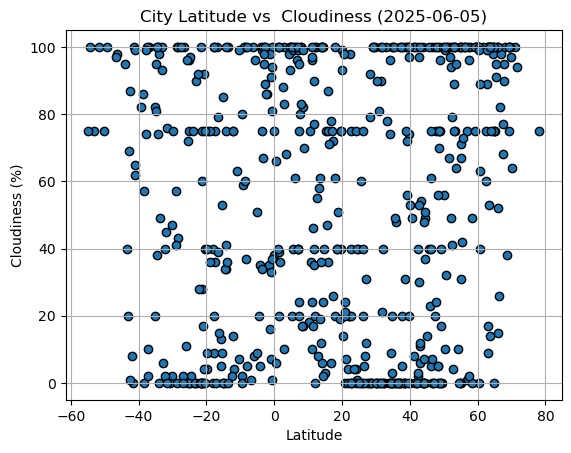

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs  Cloudiness (2025-06-05)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

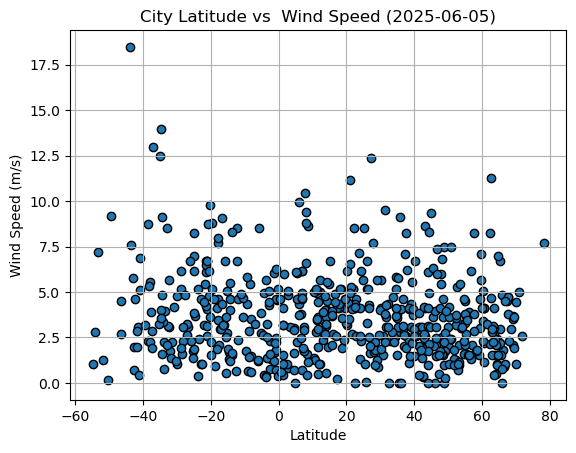

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black', marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs  Wind Speed (2025-06-05)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    
    # Creates a scatter plot with linear regression line and shows the R-squared value.
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared = f"R² = {r_value**2:.3f}"

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Show line equation and R-squared on the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq, (x_values.min(), y_values.max()*0.95), fontsize=12, color="red")
    plt.annotate(r_squared, (x_values.min(), y_values.max()*0.85), fontsize=12, color="red")
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    plt.show()


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                   
0             tralee  52.2704   -9.7026     10.30        94          94   
1        bamboo flat  11.7000   92.7167     30.05        79          40   
2        olonkinbyen  70.9221   -8.7187      1.39        98         100   
8        nova sintra  14.8667  -24.7167     23.28        84           3   
12       yellowknife  62.4560 -114.3525     11.29        71          75   

         Wind Speed Country        Date  
City_ID                                  
0              1.28      IE  1749263573  
1              0.51      IN  1749263575  
2              5.01      SJ  1749263127  
8              5.44      CV  1749263583  
12             8.23      CA  1749263422

In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                      
3        puerto natales -51.7236  -72.4875      6.69        94         100   
4             carnarvon -24.8667  113.6333     23.48        35           0   
5           nova vicosa -17.8919  -39.3719     22.07        88           9   
6             grytviken -54.2811  -36.5092      0.38        99         100   
7          invercargill -46.4000  168.3500      5.57        78          98   

         Wind Speed Country        Date  
City_ID                                  
3              1.26      CL  1749263404  
4              7.00      AU  1749263578  
5              3.45      BR  1749263282  
6              2.82      GS  1749263580  
7              2.68      NZ  1749263581

###  Temperature vs. Latitude Linear Regression Plot

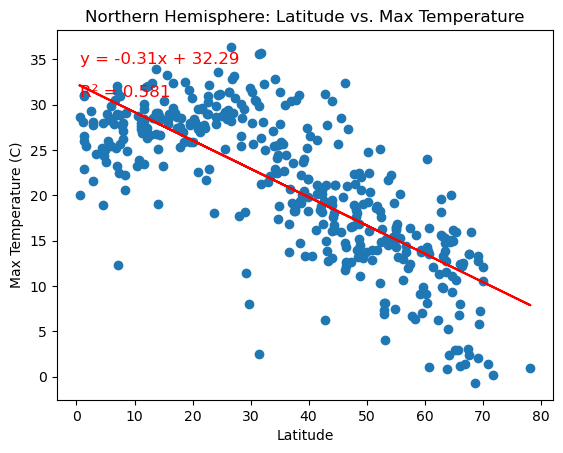

In [26]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Max Temp"],
                       "Latitude",
                       "Max Temperature (C)",
                       "Northern Hemisphere: Latitude vs. Max Temperature")

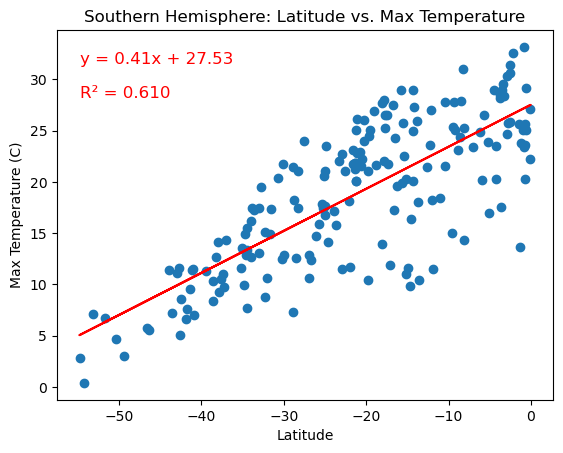

In [27]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Max Temp"],
                       "Latitude",
                       "Max Temperature (C)",
                       "Southern Hemisphere: Latitude vs. Max Temperature")

**Discussion about the linear relationship:** 

The scatter plots show a clear **negative correlation** between latitude and temperature in both hemispheres, meaning temperature **decreases as distance from the equator increases**.

**Northern Hemisphere:**
The trend shows decreasing temperatures with increasing latitude, but the data is more scattered. This suggests other geographic factors—like varied terrain and landmass—are influencing the relationship, making it less consistent.

**Southern Hemisphere:**
The trend is stronger and more linear, with temperatures rising more predictably as latitude decreases toward the equator. The tighter clustering of points indicates a clearer relationship, likely due to the ocean-dominated geography providing more uniform climate patterns.


### Humidity vs. Latitude Linear Regression Plot

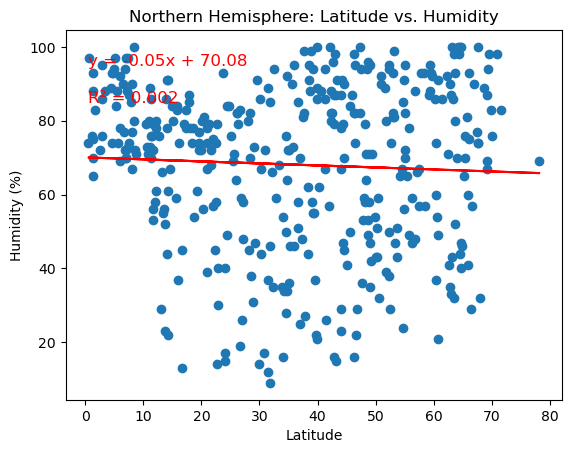

In [30]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Humidity"],
                       "Latitude",
                       "Humidity (%)",
                       "Northern Hemisphere: Latitude vs. Humidity")

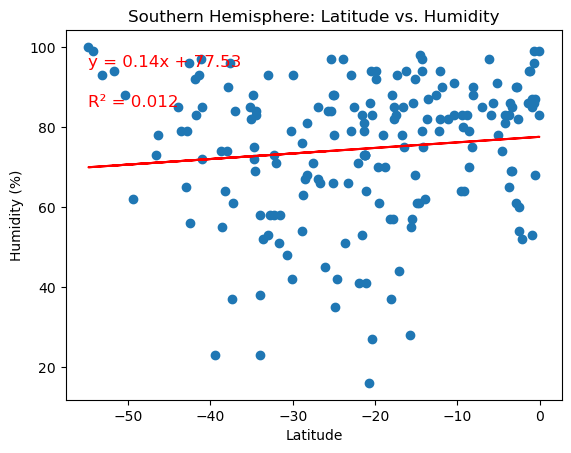

In [31]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Humidity"],
                       "Latitude",
                       "Humidity (%)",
                       "Southern Hemisphere: Latitude vs. Humidity")

**Discussion about the linear relationship:** 

* Both scatter plots display **no clear relationship** between **latitude** and **humidity**.
* The **R² values** are very low in both hemispheres, confirming that **latitude does not explain humidity levels**.
* **Northern Hemisphere:** The data is widely scattered with no trend—latitude has little effect on humidity.
* **Southern Hemisphere:** The regression line shows a slight upward slope, but the R² value (\~0.007) indicates it's **statistically meaningless**.


### Cloudiness vs. Latitude Linear Regression Plot

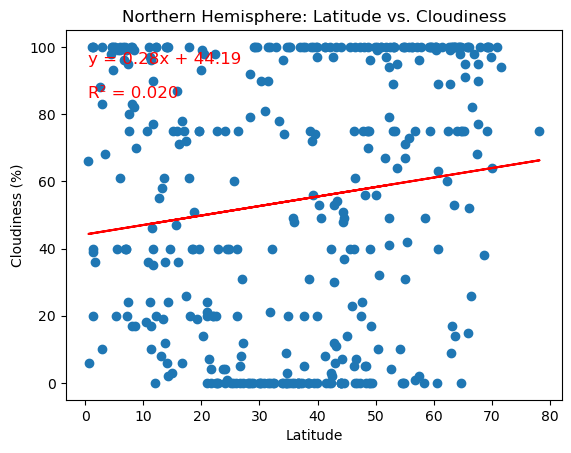

In [34]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Cloudiness"],
                       "Latitude",
                       "Cloudiness (%)",
                       "Northern Hemisphere: Latitude vs. Cloudiness")

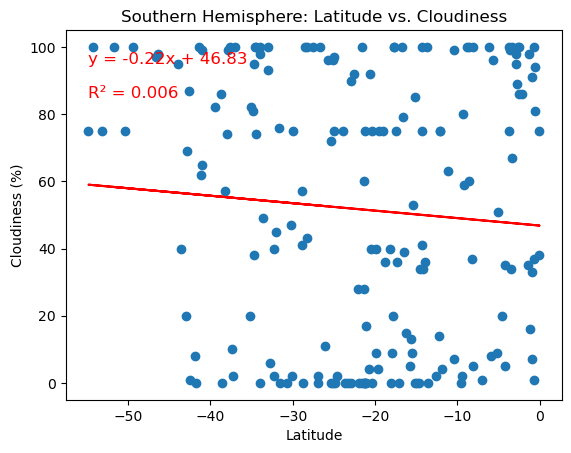

In [35]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Cloudiness"],
                       "Latitude",
                       "Cloudiness (%)",
                       "Southern Hemisphere: Latitude vs. Cloudiness")


**Discussion about the linear relationship:** 

* Both hemispheres show **no strong relationship** between latitude and cloudiness.
* **R² values are very low**, confirming that **latitude is not a reliable predictor** of cloud cover.
* **Scatter plots appear random**, indicating **local weather conditions** are more influential.


### Wind Speed vs. Latitude Linear Regression Plot

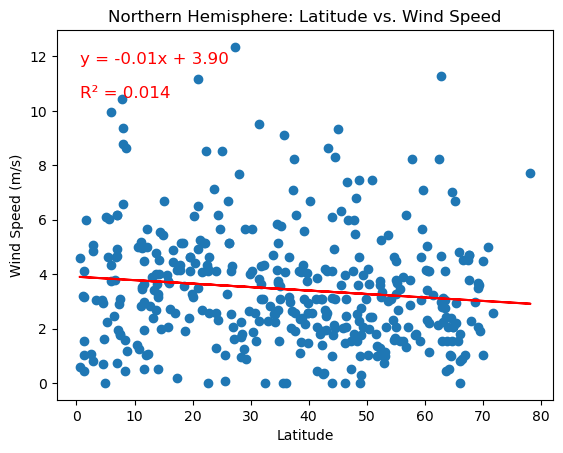

In [38]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Wind Speed"],
                       "Latitude",
                       "Wind Speed (m/s)",
                       "Northern Hemisphere: Latitude vs. Wind Speed")

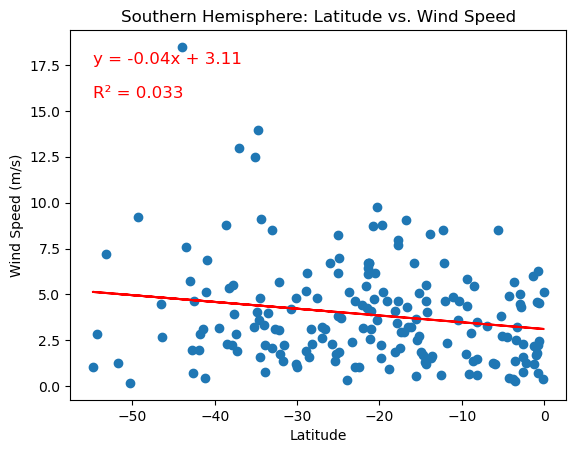

In [39]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Wind Speed"],
                       "Latitude",
                       "Wind Speed (m/s)",
                       "Southern Hemisphere: Latitude vs. Wind Speed")

**Discussion about the linear relationship:** 

* Both hemispheres exhibit **very low R² values**, showing **no significant correlation** between latitude and wind speed.
* The **Northern Hemisphere** trend is **nearly flat**.
* The **Southern Hemisphere** shows a **slightly downward slope**, but **both trends are weak and not meaningful**.
